In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
Train = pd.read_csv('train.csv')
Test = pd.read_csv('test.csv')

# Visualisation des données

In [4]:
Train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
Train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
Test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [8]:
Test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

On sent fort que la colonne **Cabin** se serira pas à grand chose

De plus pas certain que ça serve dans le modèle!

- On peut donc la supprimer.

In [9]:
Test = Test.drop(['Cabin'], axis = 1)

# ANALYSONS LES DONNEES

Nous voyons que nous avons des données de type object et des données de type numérique.
Analysons les!

In [21]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
Train_num  = Train.select_dtypes(include=numerics)
Train_cat  = Train.select_dtypes(exclude=numerics)

Cols_Num =Train_num.columns
Cols_Cat = Train_cat.columns

Cols_Num, Cols_Cat

(Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object'),
 Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object'))

- Passenger ID ne sert à rien!
- Survived est la variable cible
 - On peut donc l'enlever
- Name ne risque pas de servir à quelque chose!

In [22]:
Cols_Num =Cols_Num[2:]
Cols_Cat = Cols_Cat[1:]

Cols_Num, Cols_Cat

(Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object'),
 Index(['Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object'))

In [34]:
Train_Num = Train[Cols_Num]
Train_Cat = Train[Cols_Cat]

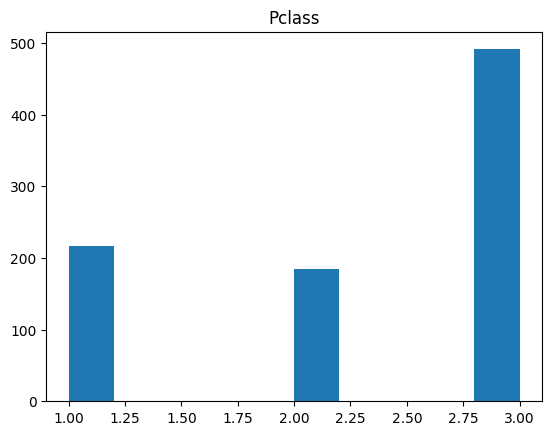

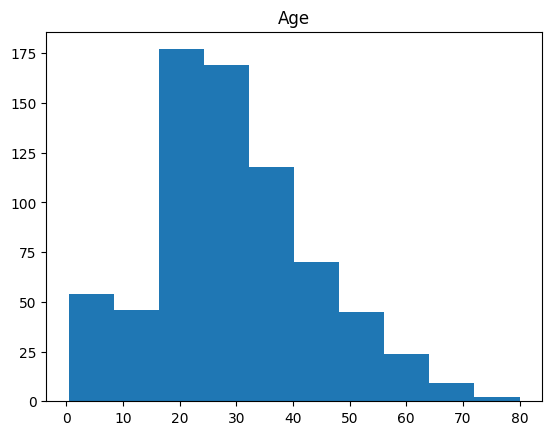

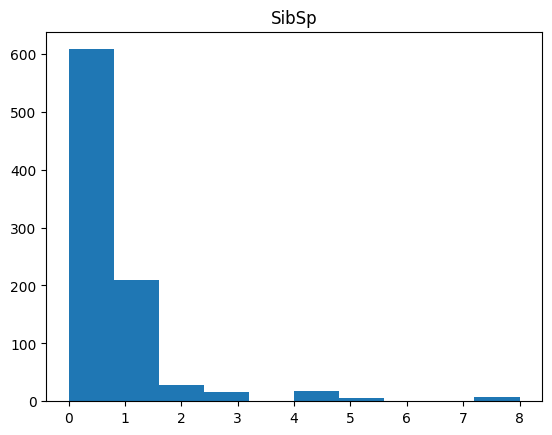

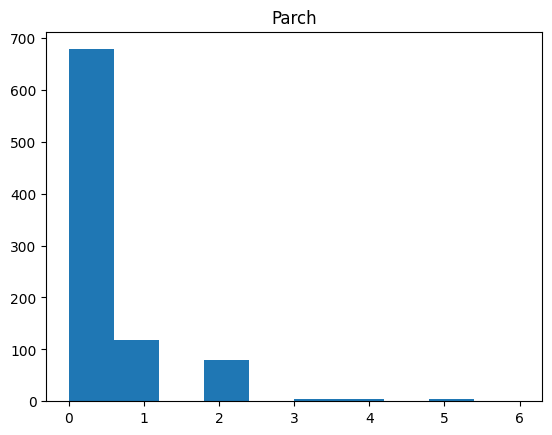

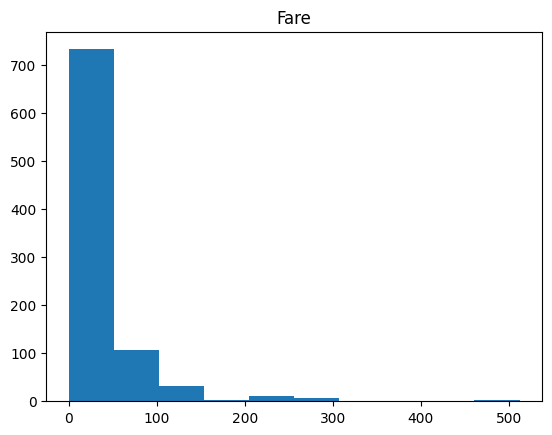

In [32]:
for i in Train_Num.columns:
    plt.hist(Train_num[i])
    plt.title(i)
    plt.show()

# Analysons plus en profondeur

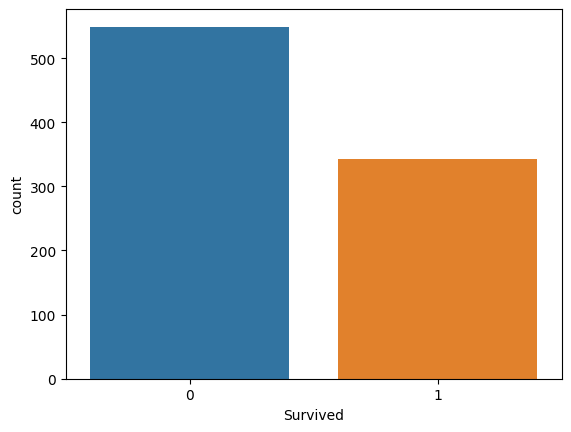

In [40]:
sns.countplot(Train['Survived'])
plt.show()


Nous avons une idée de la proportion décédé sur le Titanic :
- 2/3 des gens sont décédés
- 1/3 à survécu

Ceci dit, nous ne savons pas quel sex majoritairement, que âge, que type de ticket...etc.

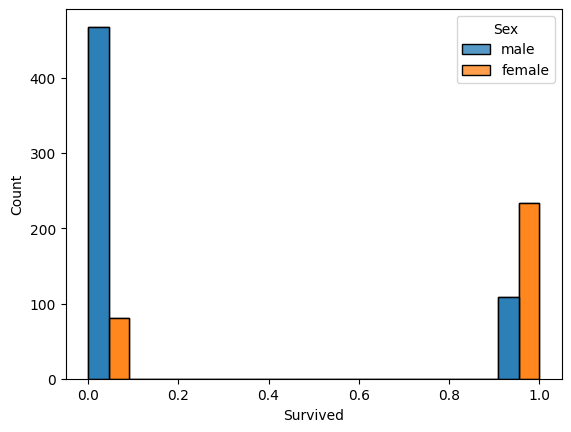

In [42]:
sns.histplot(data=Train, x="Survived", hue="Sex",multiple="dodge")
plt.show()

Globalement :
- Pour mourir, fallait être un homme
- Pour vivre, il fallait mieux être une femme.

Déterminons l'âge des personnes décédés et survivants

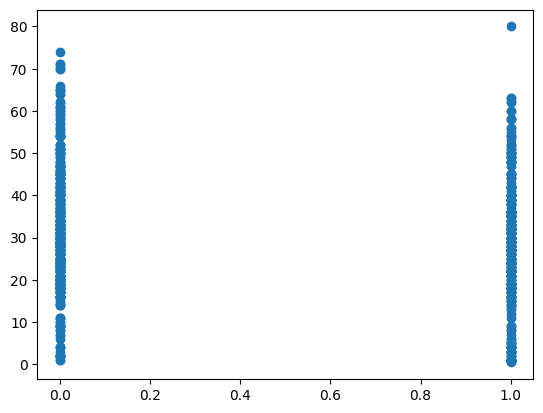

In [43]:
#répartition de l'age des survivant et décédé
plt.scatter(Train['Survived'], Train['Age'])
plt.show()

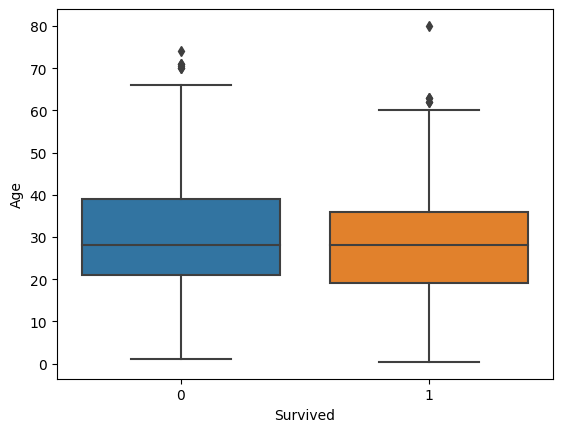

In [44]:
sns.boxplot(x="Survived", y="Age", data=Train)
plt.show()

Grosso modo :
- Chez les décédés :
 - la majorité avait entre 20 et 40 ans
- Chez les survivants
 - la majorité avaient 20 et 35 ans
 - Les personnes de plus de 60 ans avaient peu de chance de survivre
 
On peut dire que :
- SI tu es une femme
- Si tu as entre 20 et 35 ans

Alors tu as une grande probabilité de survivre au Titanic!

L'âge à donc une importance toute particulière pour la construction de notre modèle!

**ATTENTION** : la *Class* à laquelle on appartenait avait-elle une importance ou non?

In [49]:
Train['Pclass'] = Train['Pclass'].astype('int32')

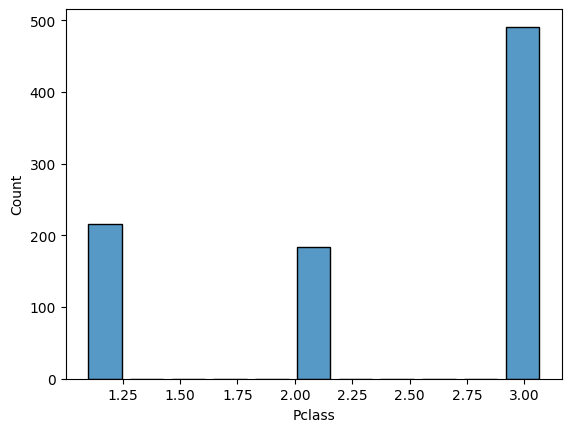

In [50]:
sns.histplot(data=Train, x='Pclass', shrink=.8)
plt.show()

- **CLASSE 1** contenait 200 personnes
- **CLASSE 2** contenait environs 200 personnes
- **CLASSE 3** était la plus remplie : 500 personnes

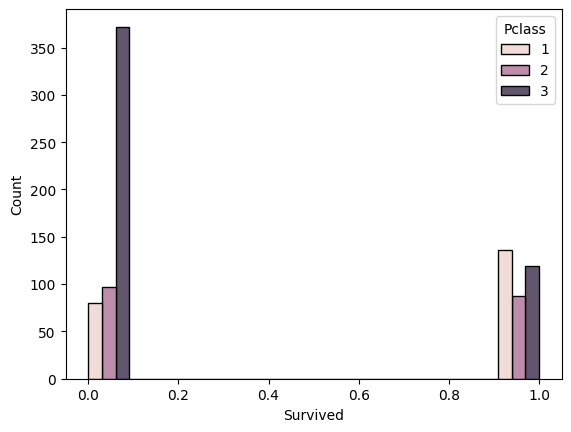

In [51]:
sns.histplot(data=Train, x="Survived", hue='Pclass',multiple="dodge" )
plt.show()

- **Classe 1** est la plus survivante!
 - Vous aussi vous pensez à Rose?
- **Classe 2** contient autant de survivant que de décedé!
- **Classe 3** est la plus touchée! 
 - Vous aussi vous pensez à Jack?

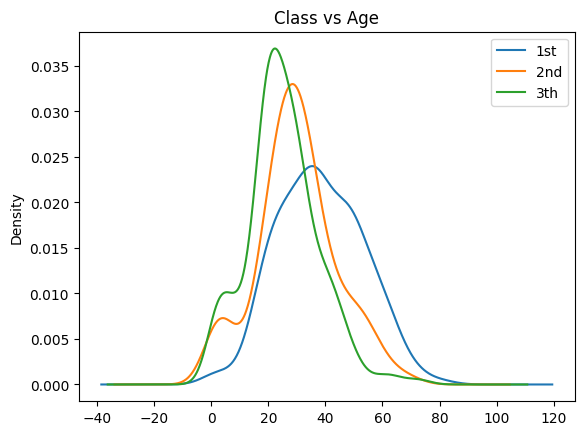

In [52]:
for x in range(1,4):
    Train['Age'][Train['Pclass']==x].plot(kind='kde')
    
plt.title('Class vs Age')
plt.legend(('1st','2nd','3th'))
plt.show()
    

**Que peut-on en conclure?**

- Il y a énormement de jeunes dans la classe 3
 - COmme si ils voulaient faire leur vie aux US!
- La Classe 2 est intermédiaire
- La Classe 1 est la plus viellissante!

**ATTENTION**

Nous avons remarqué que la colonne âge possédait des données incomplete.

- Vu le peu de données manquantes, remplissons la avec la médiane!
 - Vu que l'âge se comporte comme une loi normale

In [53]:
Train['Age']=Train['Age'].fillna(Train['Age'].median())

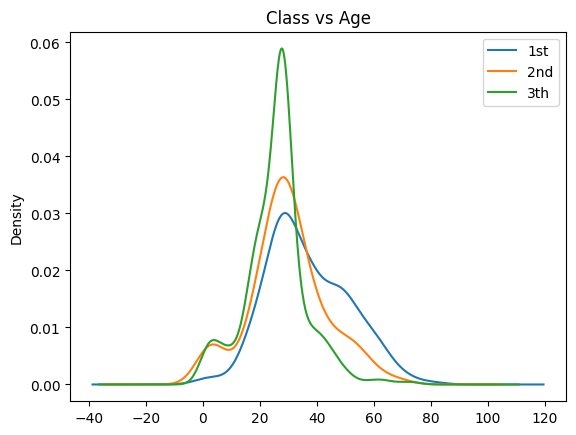

In [55]:
# Retraçons le graphique!

for x in range(1,4):
    Train['Age'][Train['Pclass']==x].plot(kind='kde')
    
plt.title('Class vs Age')
plt.legend(('1st','2nd','3th'))
plt.show()

Les données sont plus ou moins les mêmes.
- Mais la classe 3 est la plus touchée, mais aussi la plus jeune!

In [56]:
Train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [57]:
Train['Died']=1-Train['Survived']
Train.groupby('Sex').agg('sum')[['Survived','Died']]

,Survived,Died
Sex,,
female,233,81
male,109,468


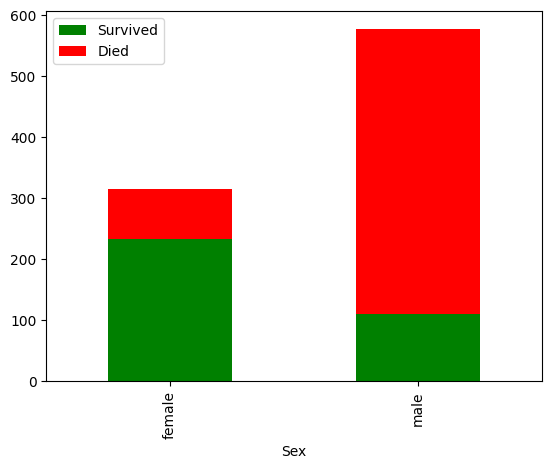

In [60]:
Train.groupby('Sex').agg('sum')[['Survived','Died']].plot(kind = 'bar', stacked = True, color=['g','r'])
plt.show()

- Notre remarque comme quoi il fallait être **du sexe feminin** sur le titanic est totalement fondée!

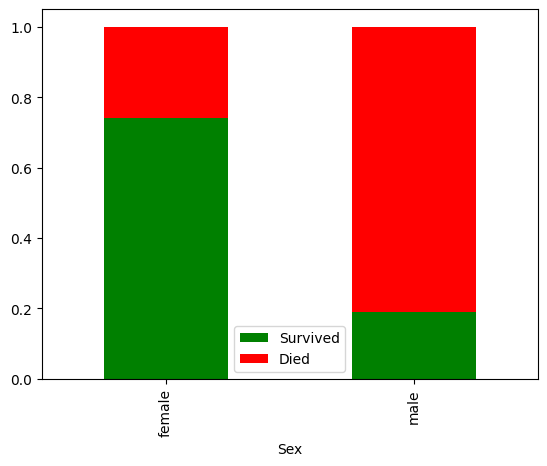

In [61]:
Train.groupby('Sex').agg('mean')[['Survived','Died']].plot(kind = 'bar', stacked = True, color=['g','r'])
plt.show()

- La proportion de femme survivante dans le titanic est dingue!
- Les homme eux... laisse tomber

C'est bien sur le Titanic qu'on disait :
- Les Femmes et les enfants d'abord

Mais qu'en est-il du sexe?

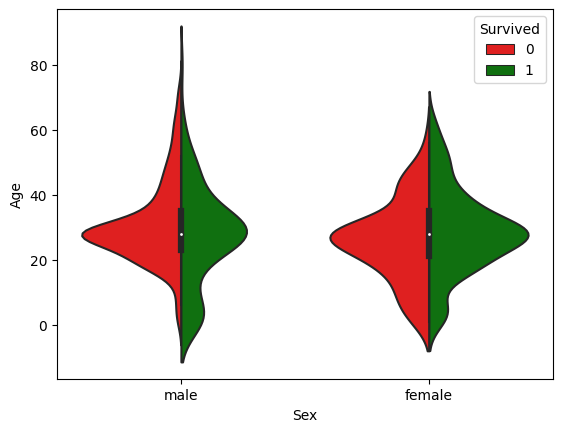

In [62]:
sns.violinplot(x='Sex', y='Age', hue = 'Survived', data = Train, split=True, palette = {0 :'r',1 :'g'})
plt.show()

Comme nous l'avons vu plus haut, la pyramide des âges est importante, avec une concentration pmlus importante de survivante chez les femmes.


Le prix du ticket, lié intrinsequement à la Classe, à-t-il une importance?

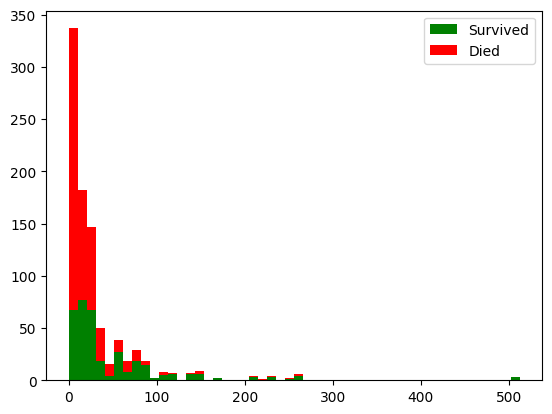

In [63]:
plt.hist([Train[Train['Survived']==1]['Fare'],Train[Train['Survived']==0]['Fare']], stacked = True, color=['g','r'], bins = 50, label=['Survived','Died'])
plt.legend()
plt.show()

- Que vu que les 3 eme classes payaient pas chers leur ticket, beaucoup sont mort.
- Cependant, ceux qui payaient cher leur ticket, avaient plus de chance de survivre!

Bref, rien n'a changé : Au plus tu as du fric, au plus on t'aide!

Ceci dit, dans le modèle, le prix du ticket aura donc son importance!
Peut-être un peu moinds, mais elle existe!

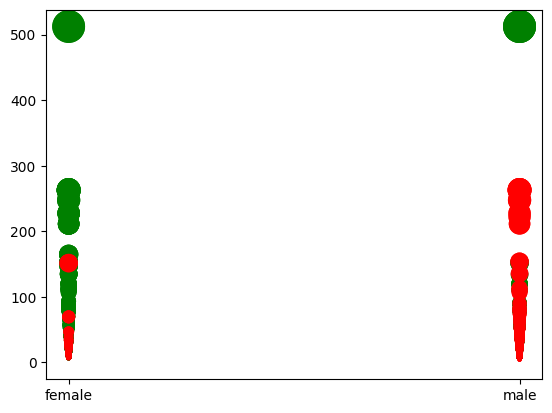

In [65]:
ax = plt.subplot()
ax.scatter(Train[Train['Survived']==1]['Sex'],Train[Train['Survived']==1]['Fare'], color='green', s =Train[Train['Survived']==1]['Fare'] )
ax.scatter(Train[Train['Survived']==0]['Sex'],Train[Train['Survived']==0]['Fare'], color='red', s =Train[Train['Survived']==0]['Fare'] )
plt.show()

- Si tu était une femme, tu survivait facilement!
- SI tu étais un homme...c'était l'inverse

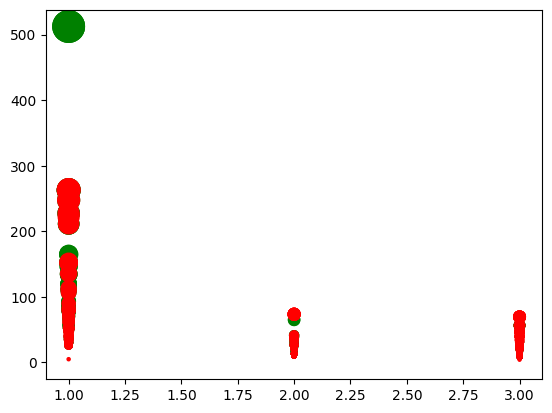

In [66]:
ax = plt.subplot()
ax.scatter(Train[Train['Survived']==1]['Pclass'],Train[Train['Survived']==1]['Fare'], color='green', s =Train[Train['Survived']==1]['Fare'] )
ax.scatter(Train[Train['Survived']==0]['Pclass'],Train[Train['Survived']==0]['Fare'], color='red', s =Train[Train['Survived']==0]['Fare'] )
plt.show()

- **CLASSE 1** : chance de survie plus élevée
- **CLASSE 2** : chance de survie normale (50-50)
- **CLASSE 3** : chance de survie faible



 

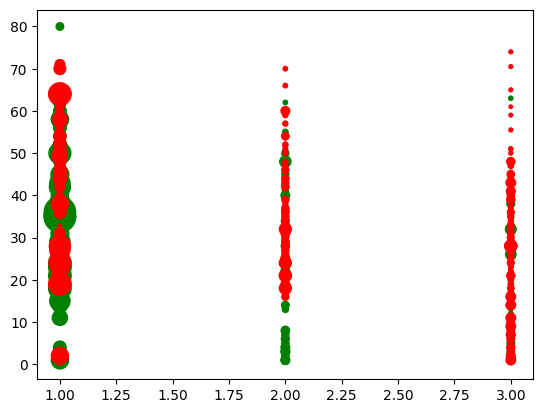

In [67]:

ax = plt.subplot()
ax.scatter(Train[Train['Survived']==1]['Pclass'],Train[Train['Survived']==1]['Age'], color='green', s =Train[Train['Survived']==1]['Fare'] )
ax.scatter(Train[Train['Survived']==0]['Pclass'],Train[Train['Survived']==0]['Age'], color='red', s =Train[Train['Survived']==0]['Fare'] )
plt.show()

L'age dans la classe à son importance :
- On survivait plus si on avait entre 20 et 40 ans.


# Conclusion

Pour le modèle, les données numériques ont leur imoportances! :
- Mieux vaut être une femme,
- De classe 1 (éventuellement 2, à la limite)
- Entre 20 et 35 ans
- Ayant payé cher son ticket

On peut faire le modèle que nous mettrons dans un fichier py dédié